In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pre_df = pd.read_csv('../data/cleaned/cleaned_vessel_calls.csv')

In [3]:
# preprocess dataframe - duration and month
pre_df["arrivalDate"] = pd.to_datetime(pre_df["arrivalDate"])
pre_df["sailingDate"] = pd.to_datetime(pre_df["sailingDate"])
pre_df["duration"] = pd.to_datetime(pre_df["sailingDate"]) - pd.to_datetime(pre_df["arrivalDate"])
pre_df["month"] = pre_df["arrivalDate"].dt.month

In [4]:
pre_df['duration'] = pre_df['duration'] / pd.Timedelta(days=1)

In [5]:
# drop null values in df
pre_df.dropna(inplace=True)

In [6]:
# preprocess data
# sort by imo number
pre_df.sort_values(by=["IMO", "arrivalDate"], inplace=True)
pre_df['next_unlocode'] = pre_df.groupby('IMO')['place.unlocode'].shift(-1)
pre_df['is_last_imo'] = pre_df['IMO'] != pre_df['IMO'].shift(-1)
pre_df = pre_df[~pre_df["is_last_imo"]]
pre_df = pre_df[pre_df["Event_Type"] != "ARRIVAL"]

In [7]:
pre_df.columns

Index(['arrivalDate', 'sailingDate', 'place.placeName', 'place.unlocode',
       'place.placeType', 'place.countryName', 'Timestamp', 'Event_Type',
       'IMO', 'vessel.vesselName', 'vessel.vesselType', 'duration', 'month',
       'next_unlocode', 'is_last_imo'],
      dtype='object')

In [8]:
pre_df

,arrivalDate,sailingDate,place.placeName,place.unlocode,place.placeType,place.countryName,Timestamp,Event_Type,IMO,vessel.vesselName,vessel.vesselType,duration,month,next_unlocode,is_last_imo
314761,2023-01-18 14:10:05,2023-01-26 04:05:00,Los Angeles,USLAX,Port,United States of America,2023-01-26T04:05:00,DEPARTURE,1026764,Max 08,Vessel Type (unspecified),7.579803,1,CNJGY,False
314763,2023-02-22 07:17:58,2023-02-23 18:56:16,Jiangyin,CNJGY,Port,People's Republic of China,2023-02-23T18:56:16,DEPARTURE,1026764,Max 08,Vessel Type (unspecified),1.484931,2,CNTXG,False
314765,2023-03-02 16:00:39,2023-03-03 12:31:09,Tianjin Xingang Port,CNTXG,Port,People's Republic of China,2023-03-03T12:31:09,DEPARTURE,1026764,Max 08,Vessel Type (unspecified),0.854514,3,CNQAW,False
314767,2023-03-04 21:02:13,2023-03-05 11:45:29,Qianwan,CNQAW,Sub Port,People's Republic of China,2023-03-05T11:45:29,DEPARTURE,1026764,Max 08,Vessel Type (unspecified),0.613380,3,CNMSN,False
314769,2023-03-06 23:30:18,2023-03-08 00:00:46,Meishan,CNMSN,Sub Port,People's Republic of China,2023-03-08T00:00:46,DEPARTURE,1026764,Max 08,Vessel Type (unspecified),1.021157,3,CNNSA,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12569,2023-09-05 05:50:48,2023-09-06 02:46:03,Port Klang (Pelabuhan Klang),MYPKG,Port,Malaysia,2023-09-06T02:46:03,DEPARTURE,9951135,Asterios,fully cellular containership,0.871701,9,INMAA,False
12571,2023-09-10 16:43:35,2023-09-11 20:02:20,Chennai (ex Madras),INMAA,Port,India,2023-09-11T20:02:20,DEPARTURE,9951135,Asterios,fully cellular containership,1.138021,9,BDCGP,False
12573,2023-09-15 05:31:56,2023-09-17 05:28:29,Chittagong (Chattogram),BDCGP,Port,Bangladesh,2023-09-17T05:28:29,DEPARTURE,9951135,Asterios,fully cellular containership,1.997604,9,THLCH,False
12575,2023-09-24 15:15:36,2023-09-25 08:23:38,Laem Chabang,THLCH,Port,Thailand,2023-09-25T08:23:38,DEPARTURE,9951135,Asterios,fully cellular containership,0.713912,9,SGSIN,False


In [9]:
pre_df = pre_df.drop(columns=["is_last_imo", "Event_Type", "Timestamp", "vessel.vesselName", "IMO", "arrivalDate", "sailingDate"])
pre_df

,place.placeName,place.unlocode,place.placeType,place.countryName,vessel.vesselType,duration,month,next_unlocode
314761,Los Angeles,USLAX,Port,United States of America,Vessel Type (unspecified),7.579803,1,CNJGY
314763,Jiangyin,CNJGY,Port,People's Republic of China,Vessel Type (unspecified),1.484931,2,CNTXG
314765,Tianjin Xingang Port,CNTXG,Port,People's Republic of China,Vessel Type (unspecified),0.854514,3,CNQAW
314767,Qianwan,CNQAW,Sub Port,People's Republic of China,Vessel Type (unspecified),0.613380,3,CNMSN
314769,Meishan,CNMSN,Sub Port,People's Republic of China,Vessel Type (unspecified),1.021157,3,CNNSA
...,...,...,...,...,...,...,...,...
12569,Port Klang (Pelabuhan Klang),MYPKG,Port,Malaysia,fully cellular containership,0.871701,9,INMAA
12571,Chennai (ex Madras),INMAA,Port,India,fully cellular containership,1.138021,9,BDCGP
12573,Chittagong (Chattogram),BDCGP,Port,Bangladesh,fully cellular containership,1.997604,9,THLCH
12575,Laem Chabang,THLCH,Port,Thailand,fully cellular containership,0.713912,9,SGSIN


In [10]:
df = pre_df.rename(columns={'place.unlocode':'current_unlocode', 'place.placeName':'port_name','vessel.vesselType':'vesselType', 'place.placeType': 'placeType', 'place.countryName': 'countryName'})
df

,port_name,current_unlocode,placeType,countryName,vesselType,duration,month,next_unlocode
314761,Los Angeles,USLAX,Port,United States of America,Vessel Type (unspecified),7.579803,1,CNJGY
314763,Jiangyin,CNJGY,Port,People's Republic of China,Vessel Type (unspecified),1.484931,2,CNTXG
314765,Tianjin Xingang Port,CNTXG,Port,People's Republic of China,Vessel Type (unspecified),0.854514,3,CNQAW
314767,Qianwan,CNQAW,Sub Port,People's Republic of China,Vessel Type (unspecified),0.613380,3,CNMSN
314769,Meishan,CNMSN,Sub Port,People's Republic of China,Vessel Type (unspecified),1.021157,3,CNNSA
...,...,...,...,...,...,...,...,...
12569,Port Klang (Pelabuhan Klang),MYPKG,Port,Malaysia,fully cellular containership,0.871701,9,INMAA
12571,Chennai (ex Madras),INMAA,Port,India,fully cellular containership,1.138021,9,BDCGP
12573,Chittagong (Chattogram),BDCGP,Port,Bangladesh,fully cellular containership,1.997604,9,THLCH
12575,Laem Chabang,THLCH,Port,Thailand,fully cellular containership,0.713912,9,SGSIN


In [11]:
# data statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170752 entries, 314761 to 12577
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   port_name         170752 non-null  object 
 1   current_unlocode  170752 non-null  object 
 2   placeType         170752 non-null  object 
 3   countryName       170752 non-null  object 
 4   vesselType        170752 non-null  object 
 5   duration          170752 non-null  float64
 6   month             170752 non-null  int32  
 7   next_unlocode     170752 non-null  object 
dtypes: float64(1), int32(1), object(6)
memory usage: 11.1+ MB


In [12]:
# print out the stats related to port appearance
print(df['current_unlocode'].value_counts().describe())

count    1772.000000
mean       96.361174
std       350.567438
min         1.000000
25%         3.000000
50%        11.000000
75%        54.000000
max      8980.000000
Name: count, dtype: float64


In [13]:
# Calculate frequency of each port for thresholding
port_counts = pd.concat([df['current_unlocode'], df['next_unlocode']]).value_counts()

# Define the threshold (assuming 500 based on your update)
threshold = port_counts.quantile(0.90)
print(threshold)

# Filter ports that meet the threshold
valid_ports_df = port_counts[port_counts >= threshold]
valid_ports = port_counts[port_counts >= threshold].index
# Keep only rows where both current and next ports are in valid_ports
filtered_df = df[(df['current_unlocode'].isin(valid_ports)) & (df['next_unlocode'].isin(valid_ports))]
filtered_df


432.4000000000001


,port_name,current_unlocode,placeType,countryName,vesselType,duration,month,next_unlocode
314765,Tianjin Xingang Port,CNTXG,Port,People's Republic of China,Vessel Type (unspecified),0.854514,3,CNQAW
314767,Qianwan,CNQAW,Sub Port,People's Republic of China,Vessel Type (unspecified),0.613380,3,CNMSN
314769,Meishan,CNMSN,Sub Port,People's Republic of China,Vessel Type (unspecified),1.021157,3,CNNSA
314771,Nansha Port,CNNSA,Sub Port,People's Republic of China,Vessel Type (unspecified),0.419896,3,CNSHK
314773,Shekou Port,CNSHK,Sub Port,People's Republic of China,Vessel Type (unspecified),0.475683,3,SGSIN
...,...,...,...,...,...,...,...,...
12569,Port Klang (Pelabuhan Klang),MYPKG,Port,Malaysia,fully cellular containership,0.871701,9,INMAA
12571,Chennai (ex Madras),INMAA,Port,India,fully cellular containership,1.138021,9,BDCGP
12573,Chittagong (Chattogram),BDCGP,Port,Bangladesh,fully cellular containership,1.997604,9,THLCH
12575,Laem Chabang,THLCH,Port,Thailand,fully cellular containership,0.713912,9,SGSIN


In [14]:
# uniqueness check
print(len(valid_ports))
print(len(set(valid_ports)))

178
178


In [15]:
# value counts of filtered_df
vc_filtered_df = pd.concat([filtered_df['current_unlocode'], filtered_df['next_unlocode']]).value_counts()
vc_filtered_df

SGSIN    14870
CNSGH     5578
KRBNP     5409
CNBEI     5304
USLGB     5294
         ...  
USEZA      243
NZTRG      239
USJNU      238
SAYBI      234
CNZJG      200
Name: count, Length: 178, dtype: int64

In [16]:
# Select a certain number of samples for each port
# Initialize an empty list to store the rows before creating the final DataFrame
rows_to_add = []

# Track how many times each port has been added
port_usage = {port: 0 for port in valid_ports}

# Shuffle the data to randomize the sampling
filtered_df = filtered_df.sample(frac=1, random_state=42)

for _, row in filtered_df.iterrows():
    current_port = row['current_unlocode']
    next_port = row['next_unlocode']
    # Check if both ports in the row can still be added
    if port_usage[current_port] < 100 and port_usage[next_port] < 100:
        rows_to_add.append(row)
        # Update the usage count for both ports
        port_usage[current_port] += 1
        port_usage[next_port] += 1

        # Stop adding if both have reached the limit
        if all(count >= 100 for count in port_usage.values()):
            break

# Create the final DataFrame from the list of rows
balanced_df = pd.DataFrame(rows_to_add)

# Reset index after all operations
balanced_df = balanced_df.reset_index(drop=True)

# Print value counts to confirm balancing
df_bal_counts = pd.concat([balanced_df['current_unlocode'], balanced_df['next_unlocode']]).value_counts()
df_bal_counts.describe()
balanced_df

,port_name,current_unlocode,placeType,countryName,vesselType,duration,month,next_unlocode
0,Yokohama,JPYOK,Port,Japan,vehicle carrier,0.264572,12,JPHIJ
1,Qianwan,CNQAW,Sub Port,People's Republic of China,fully cellular containership,1.051968,1,CNMSN
2,Vancouver,CAVAN,Port,Canada,Combined chemical and oil tanker,0.466667,12,CAVAN
3,Hamburg,DEHAM,Port,Germany,fully cellular containership,1.766424,9,FRLEH
4,Shekou Port,CNSHK,Sub Port,People's Republic of China,fully cellular containership,1.069410,1,CNXMG
...,...,...,...,...,...,...,...,...
8424,Port Arthur,USPOA,Port,United States of America,Combined chemical and oil tanker,1.735289,4,PACTB
8425,Daxie Port,CNDAX,Sub Port,People's Republic of China,product tanker,0.757431,4,CNLYG
8426,Sakai,JPSAK,Port,Japan,Combined chemical and oil tanker,0.959120,3,JPMIZ
8427,Shuwaikh,KWSWK,Port,Kuwait,vehicle carrier,0.300880,7,KRKUV


In [17]:
print(df_bal_counts.describe())
df_bal_counts.quantile(0.15)

count    178.000000
mean      94.707865
std       11.672269
min       40.000000
25%      100.000000
50%      100.000000
75%      100.000000
max      101.000000
Name: count, dtype: float64


84.0

In [18]:
threshold = df_bal_counts.quantile(0.15)
# filter ports again to remove ports in balanced_df that are not above a certain threshold from df_bal_counts
valid_ports_bal_df = df_bal_counts[df_bal_counts >= threshold]
valid_ports_bal = df_bal_counts[df_bal_counts >= threshold].index
# Keep only rows where both current and next ports are in valid_ports
filtered_bal_df = balanced_df[(balanced_df['current_unlocode'].isin(valid_ports_bal)) & (balanced_df['next_unlocode'].isin(valid_ports_bal))]
filtered_bal_df
valid_ports_bal_df

SAJBI    101
USCRP    101
JPCHB    101
KEMBA    101
USEZA    101
        ... 
TGLFW     87
USORF     86
JPYKK     86
USBY6     84
AUPKL     84
Name: count, Length: 152, dtype: int64

In [19]:
df = filtered_bal_df

In [20]:
filtered_bal_df

,port_name,current_unlocode,placeType,countryName,vesselType,duration,month,next_unlocode
0,Yokohama,JPYOK,Port,Japan,vehicle carrier,0.264572,12,JPHIJ
1,Qianwan,CNQAW,Sub Port,People's Republic of China,fully cellular containership,1.051968,1,CNMSN
2,Vancouver,CAVAN,Port,Canada,Combined chemical and oil tanker,0.466667,12,CAVAN
3,Hamburg,DEHAM,Port,Germany,fully cellular containership,1.766424,9,FRLEH
4,Shekou Port,CNSHK,Sub Port,People's Republic of China,fully cellular containership,1.069410,1,CNXMG
...,...,...,...,...,...,...,...,...
8419,Port Arthur,USPOA,Port,United States of America,product tanker,1.822685,12,USPOA
8421,Yokkaichi,JPYKK,Port,Japan,fully cellular containership,0.192118,10,JPSMZ
8423,Port Kembla,AUPKL,Port,Australia,bulk carrier,2.033981,11,AUPKL
8427,Shuwaikh,KWSWK,Port,Kuwait,vehicle carrier,0.300880,7,KRKUV


In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode categorical features
label_encoders = {}
for column in ['port_name', 'placeType', 'countryName', 'vesselType']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

C:\Users\syeda\AppData\Local\Temp\ipykernel_41644\3627801224.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column].astype(str))
C:\Users\syeda\AppData\Local\Temp\ipykernel_41644\3627801224.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column].astype(str))
C:\Users\syeda\AppData\Local\Temp\ipykernel_41644\3627801224.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [22]:
# manually map everything to integers for unlocode
# Combine both columns to find all unique ports
all_ports = pd.concat([df['current_unlocode'], df['next_unlocode']])

# Create unique identifiers for each port
unique_ports = all_ports.unique()
port_to_id = {port: i for i, port in enumerate(unique_ports)}

df['encoded_current_unlocode'] = df['current_unlocode'].map(port_to_id)
df['encoded_next_unlocode'] = df['next_unlocode'].map(port_to_id)

# Print the first few rows of the DataFrame to verify the encoding
print(df.head())


   port_name current_unlocode  placeType  countryName  vesselType  duration  \
0        149            JPYOK          0           18          14  0.264572   
1        108            CNQAW          1           30           6  1.051968   
2        140            CAVAN          0            4           0  0.466667   
3         47            DEHAM          0            9           6  1.766424   
4        116            CNSHK          1           30           6  1.069410   

   month next_unlocode  encoded_current_unlocode  encoded_next_unlocode  
0     12         JPHIJ                         0                    128  
1      1         CNMSN                         1                     41  
2     12         CAVAN                         2                      2  
3      9         FRLEH                         3                    138  
4      1         CNXMG                         4                     37  


C:\Users\syeda\AppData\Local\Temp\ipykernel_41644\2382646095.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['encoded_current_unlocode'] = df['current_unlocode'].map(port_to_id)
C:\Users\syeda\AppData\Local\Temp\ipykernel_41644\2382646095.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['encoded_next_unlocode'] = df['next_unlocode'].map(port_to_id)


In [23]:
ports = df[['current_unlocode', 'encoded_current_unlocode', 'next_unlocode', 'encoded_next_unlocode']]
ports

,current_unlocode,encoded_current_unlocode,next_unlocode,encoded_next_unlocode
0,JPYOK,0,JPHIJ,128
1,CNQAW,1,CNMSN,41
2,CAVAN,2,CAVAN,2
3,DEHAM,3,FRLEH,138
4,CNSHK,4,CNXMG,37
...,...,...,...,...
8419,USPOA,117,USPOA,117
8421,JPYKK,133,JPSMZ,110
8423,AUPKL,42,AUPKL,42
8427,KWSWK,36,KRKUV,96


In [ ]:
df = df.drop(columns=['current_unlocode', 'next_unlocode'])

In [47]:
df = df.drop(columns=['month', 'placeType'])

In [48]:
# Prepare features and target variable
X = df.drop(['encoded_next_unlocode'], axis=1)
y = df['encoded_next_unlocode']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [49]:
# scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
X_train

array([[0.86092715, 0.44897959, 0.42857143, 0.01113187, 0.39735099],
       [0.43046358, 0.36734694, 1.        , 0.00352436, 0.38410596],
       [0.34437086, 0.69387755, 1.        , 0.00795935, 0.45033113],
       ...,
       [0.46357616, 0.91836735, 0.42857143, 0.0285945 , 0.42384106],
       [0.86754967, 0.30612245, 0.42857143, 0.00366447, 0.50993377],
       [0.25827815, 0.        , 0.42857143, 0.00922974, 0.71523179]])

In [51]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [52]:
from sklearn.metrics import accuracy_score
# Make predictions
y_pred = model.predict(X_test)
 
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.3252658599193253

In [53]:
print('Training Accuracy : ', 
      accuracy_score(y_train,
                             model.predict(X_train))*100)
print('Validation Accuracy : ', 
      accuracy_score(y_test, 
                             model.predict(X_test))*100)

Training Accuracy :  46.25916870415648
Validation Accuracy :  32.52658599193253


In [54]:
print(y_test)
print(y_train)

271      83
7799     77
7654      8
6726     19
2875     88
       ... 
234       0
1609     29
1279    149
2920     97
981      10
Name: encoded_next_unlocode, Length: 2727, dtype: int64
347       7
2080    107
3311     73
2238      1
4108     87
       ... 
4332    111
6131    143
6181     62
6391    108
972      34
Name: encoded_next_unlocode, Length: 4090, dtype: int64


In [55]:
y_test

271      83
7799     77
7654      8
6726     19
2875     88
       ... 
234       0
1609     29
1279    149
2920     97
981      10
Name: encoded_next_unlocode, Length: 2727, dtype: int64

In [56]:
# Trying to use RandomSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Define the model
model = RandomForestClassifier(random_state=42)

# Setup the parameter grid
param_grid = {
    'n_estimators': np.arange(50, 501, 50),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6, 10],
    'max_features': ['sqrt', 'log2', None]  # Corrected from 'auto' to 'sqrt'
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, 
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1,
                                   error_score='raise')  # Adding error_score='raise' to get clearer error messages

try:
    random_search.fit(X_train, y_train)
except Exception as e:
    print("Error during fitting:", e)


# Evaluate the best model found by RandomizedSearchCV
best_model = random_search.best_estimator_
train_predictions = best_model.predict(X_train)
test_predictions = best_model.predict(X_test)

print('Training Accuracy : ', accuracy_score(y_train, train_predictions) * 100)
print('Validation Accuracy : ', accuracy_score(y_test, test_predictions) * 100)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Training Accuracy :  62.640586797066014
Validation Accuracy :  34.433443344334435


In [57]:
print(random_search.best_estimator_)

RandomForestClassifier(min_samples_split=10, n_estimators=350, random_state=42)


In [58]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": random_search.best_estimator_.feature_importances_}
).sort_values("importance", ascending=False)


# Display
feature_importances_df

,feature,importance
3,duration,0.312368
4,encoded_current_unlocode,0.206890
0,port_name,0.202338
1,countryName,0.184024
2,vesselType,0.094380


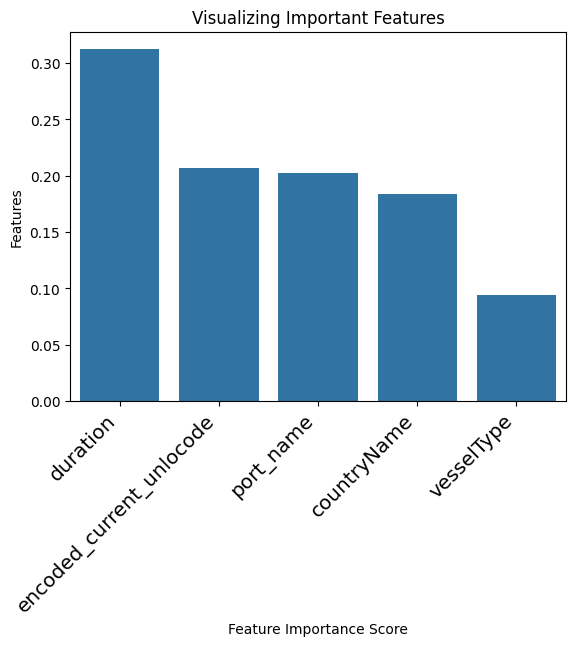

In [59]:
# Creating a bar plot
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
# Add labels to your

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()